# Dinamični sistemi v okolju
**1. Vaje | doc. dr. Rene Markovič**

**Kazalo**<a id='toc0_'></a>    
- [Harmonični oscilator](#toc1_)    
  - [Teoretična obravnava](#toc1_1_)    
  - [Analitična izpeljava enačbe](#toc1_2_)    
  - [Graf spreminjanja lege v odvisnosti od časa](#toc1_3_)    
  - [Hitrost v odvisnosti od časa](#toc1_4_)    
  - [Fiksna točka za harmonski oscilator](#toc1_5_)    
    - [Enačba gibanja](#toc1_5_1_)    
    - [Pogoj za fiksno točko](#toc1_5_2_)    
      - [Položaj $ x(t) = 0 $](#toc1_5_2_1_)    
      - [Hitrost $ v(t) = 0 $](#toc1_5_2_2_)    
    - [Zaključek](#toc1_5_3_)    
- [Jakobijeva matrika in lastne vrednosti za harmonski oscilator](#toc2_)    
  - [Sistemska enačba harmonskega oscilatorja](#toc2_1_)    
  - [Prikaz faznega prostora in fazne trajektorije](#toc2_2_)    
- [Dušeno nihanje](#toc3_)    
  - [Definicija sistema (enačba gibanja)](#toc3_1_)    
  - [Graf $x(t)$ in $v(t)$ za harmonični oscilator](#toc3_2_)    
  - [Stabilnost](#toc3_3_)    
  - [Lastne vrednosti Jacobijeve matrike $J$](#toc3_4_)    
  - [Fazni diagram za dušen harmonski oscilator](#toc3_5_)    
  - [Kritično dušenje](#toc3_6_)    
- [Diskretni sistemi](#toc4_)    
  - [ Model populacijske rasti](#toc4_1_)    
  - [Kaj če je faktor reprodukcije $\leq$ 1?](#toc4_2_)    
  - [Kaj če je faktor reprodukcije $1 < r \leq$ 2?](#toc4_3_)    
  - [Kaj če je faktor reprodukcije $2 < r \leq$ 3?](#toc4_4_)    
  - [Kaj če je faktor reprodukcije $3 < r \leq$ 4?](#toc4_5_)    
  - [Kako se stacionarne točke spreminjajo glede na $r$?](#toc4_6_)    

<!-- vscode-jupyter-toc-config
    numbering=false
    anchor=true
    flat=false
    minLevel=1
    maxLevel=6
    /vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Harmonični oscilator](#toc0_)

## <a id='toc1_1_'></a>[Teoretična obravnava](#toc0_)

Kot primer obravnavajmo preprosto nihanje. Enačba gibanja za harmonski oscilator (vzmet):

$$
    \begin{equation}
        m \ddot{x} (t) = -k x (t)
    \end{equation}
$$

To enačbo lahko zapišemo tudi kot:
$$
    \begin{equation}
        \ddot{x} (t) + \omega_0^2 x (t) = 0
    \end{equation}
$$
kjer je $\omega_0 = \sqrt{\frac{k}{m}}$ lastna frekvenca nihanja. Rešitev te diferencialne enačbe je:

$$
    \begin{equation}
        x(t) = A \cos(\omega_0 t + \varphi)
    \end{equation}
$$

kjer:
- $A$ je amplituda nihanja,
- $\varphi$ je fazni premik.



**Q:** Ali je $x$ v tem primeru avtonomna spremenljivka? <br>
**A:** Ne, ker je odvisna od časa.

In [8]:
import sympy as sp

# Definiramo spremenljivke
t = sp.symbols('t')
x = sp.Function('x')(t)
v = sp.Function('v')(t)
m, k = sp.symbols('m k')

In [9]:
# Zapišemo diferencialno enačbo
eq = sp.Eq(x.diff(t, t) + (k/m) * x, 0)
eq

Eq(k*x(t)/m + Derivative(x(t), (t, 2)), 0)

## <a id='toc1_2_'></a>[Analitična izpeljava enačbe](#toc0_)

Spomnimo se, da lahko $t*\sqrt{-\frac{k}{m}}$ zapišemo tudi kot $i \omega_0 t$. Potrem lahko zgornjo enačbo zapišemo tudi v kompleksni obliki:
$$x(t) = C_1 e^{-i \omega_0 t} + C_2 e^{i \omega_0 t}.$$

V naslednjem koraku razpišemo zgorjno enačbo v trigonomerični obliki:
$$x(t) = C_1 (\cos(\omega_0 t) - i \sin(\omega_0 t)) + C_2 (\cos(\omega_0 t) + i \sin(\omega_0 t))$$
$$ x(t)= (C_1 + C_2) \cos(\omega_0 t) + i (C_2 - C_1) \sin(\omega_0 t).$$
$$ x(t)= A \cos(\omega_0 t) + B \sin(\omega_0 t).$$

$$ x_0 = sqrt(A^2 + B^2)$$
$$ \varphi = arctan(\frac{B}{A})$$
$$ x(t) = x_0 \cos(\omega_0 t + \varphi)$$

In [10]:
x0, v0 = sp.symbols('x0 v0')
# initial positio# Solve the differential equation with initial conditions
sol = sp.dsolve(eq, x, ics={x.subs(t, 0): x0, x.diff(t).subs(t, 0): v0})
sol

Eq(x(t), (-v0 + x0*sqrt(-k/m))*exp(-t*sqrt(-k/m))/(2*sqrt(-k/m)) + (v0 + x0*sqrt(-k/m))*exp(t*sqrt(-k/m))/(2*sqrt(-k/m)))

## <a id='toc1_3_'></a>[Graf spreminjanja lege v odvisnosti od časa](#toc0_)

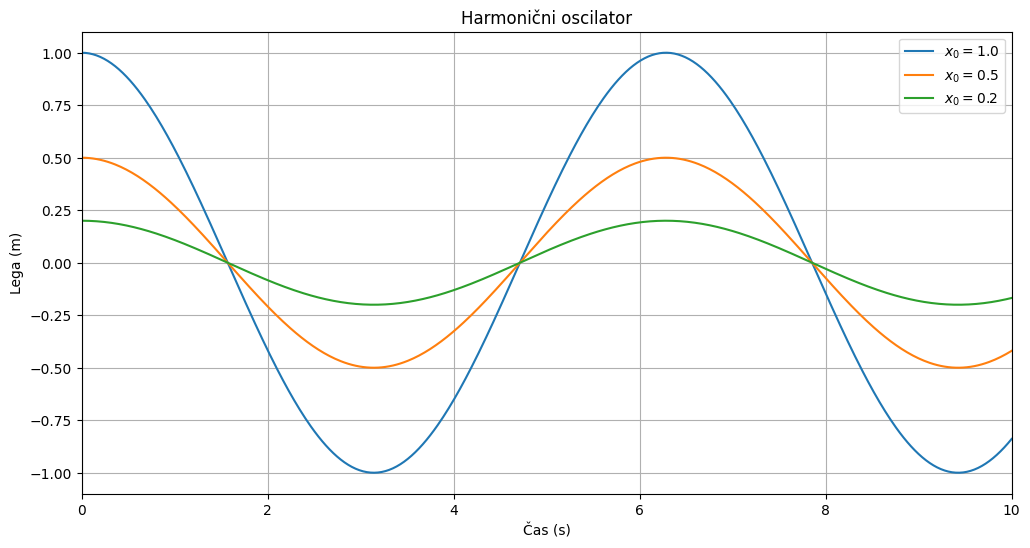

In [11]:
# Numerical simulation for the undamped harmonic oscillator dynamics
import numpy as np
import matplotlib.pyplot as plt

# Define constants
m_value = 1.0  # mass
k_value = 1.0  # spring constant
omega0 = np.sqrt(k_value / m_value)  # natural frequency
x0_value = 1.0  # initial position
v0_value = 0.0  # initial velocity

# Define time array for simulation
t_values = np.linspace(0, 10, 500)

# Analytical solution for the undamped harmonic oscillator
# x(t) = x0 * cos(omega0 * t) + (v0 / omega0) * sin(omega0 * t)
x_t_values_1 = x0_value * np.cos(omega0 * t_values) + (v0_value / omega0) * np.sin(omega0 * t_values)
x_t_values_2 = 0.5*x0_value * np.cos(omega0 * t_values) + (v0_value / omega0) * np.sin(omega0 * t_values)
x_t_values_3 = 0.2*x0_value * np.cos(omega0 * t_values) + (v0_value / omega0) * np.sin(omega0 * t_values)

# Plotting the solution
plt.figure(figsize=(12, 6))
plt.title("Harmonični oscilator")

plt.plot(t_values, x_t_values_1, label="$x_0 = 1.0$")
plt.plot(t_values, x_t_values_2, label="$x_0 = 0.5$")
plt.plot(t_values, x_t_values_3, label="$x_0 = 0.2$")

plt.xlabel("Čas (s)")
plt.ylabel("Lega (m)")
plt.grid(True)
plt.xlim(0,10)
plt.legend()
plt.show()

## <a id='toc1_4_'></a>[Hitrost v odvisnosti od časa](#toc0_)

In [12]:
x_t = sol.rhs  # Right-hand side of the solution

# Derive velocity as the time derivative of displacement using sympy
v_t = sp.diff(x_t, t)
v_t

-(-v0 + x0*sqrt(-k/m))*exp(-t*sqrt(-k/m))/2 + (v0 + x0*sqrt(-k/m))*exp(t*sqrt(-k/m))/2

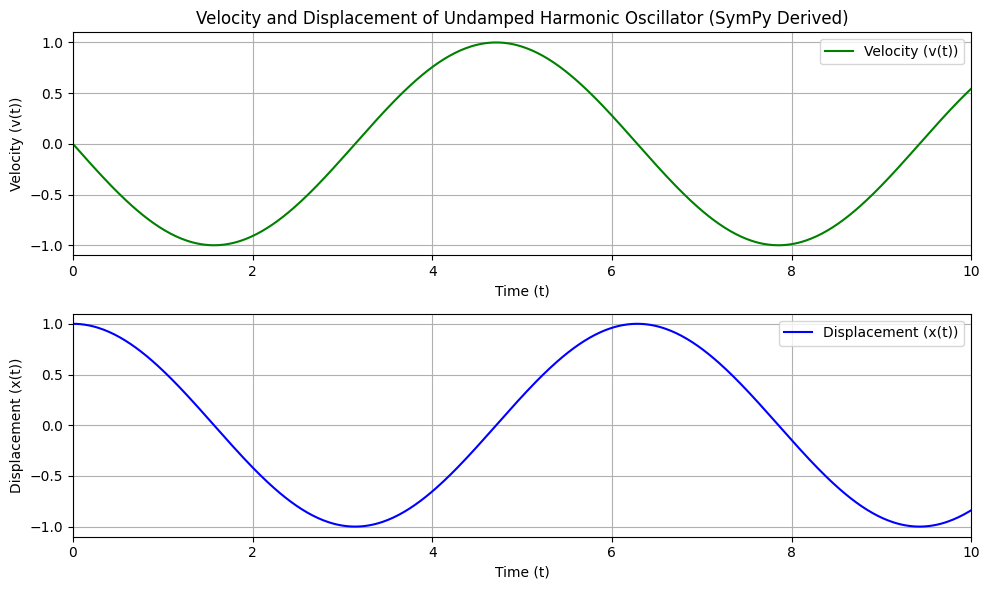

In [13]:
# Define numerical constants for the system
k_value = 1.0  # spring constant
m_value = 1.0  # mass
omega_0_value = np.sqrt(k_value / m_value)  # natural frequency
x0_value = 1.0  # initial displacement
v0_value = 0.0  # initial velocity

# Substitute the values into the symbolic velocity solution
v_t_numeric = v_t.subs({k: k_value, m: m_value, x0: x0_value, v0: v0_value})

# Convert the symbolic velocity expression to a numerical function
v_t_numeric_function = sp.lambdify(t, v_t_numeric, 'numpy')

# Time values for numerical simulation
t_values_numeric = np.linspace(0, 10, 500)

# Compute the velocity using the derived sympy solution
v_t_values_numeric = v_t_numeric_function(t_values_numeric)

# Compute the displacement using the solution from sol_undamped
x_t_numeric = x_t.subs({k: k_value, m: m_value, x0: x0_value, v0: v0_value})
x_t_numeric_function = sp.lambdify(t, x_t_numeric, 'numpy')
x_t_values_numeric = x_t_numeric_function(t_values_numeric)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot velocity derived from sol_undamped
plt.subplot(2, 1, 1)
plt.plot(t_values_numeric, v_t_values_numeric, label="Velocity (v(t))", color='green')
plt.title("Velocity and Displacement of Undamped Harmonic Oscillator (SymPy Derived)")
plt.xlabel("Time (t)")
plt.ylabel("Velocity (v(t))")
plt.grid(True)
plt.xlim(0,10)
plt.legend()

# Plot displacement derived from sol_undamped
plt.subplot(2, 1, 2)
plt.plot(t_values_numeric, x_t_values_numeric, label="Displacement (x(t))", color='blue')
plt.xlabel("Time (t)")
plt.ylabel("Displacement (x(t))")
plt.grid(True)
plt.legend()
plt.xlim(0,10)
plt.tight_layout()
plt.show()

## <a id='toc1_5_'></a>[Fiksna točka za harmonski oscilator](#toc0_)



Fiksna točka v dinamičnih sistemih je stanje, kjer se sistem ne spreminja skozi čas. To pomeni, da v fiksni točki tako položaj kot hitrost sistema ostaneta konstantna (v našem primeru enaka nič). Pri harmonskem oscilatorju se to zgodi v ravnovesni točki, kjer sistem miruje.

### <a id='toc1_5_1_'></a>[Enačba gibanja](#toc0_)

Gibanje harmonskega oscilatorja je podano z enačbo:

$$
m \frac{d^2 x(t)}{dt^2} + k x(t) = 0,
$$

kjer:
- $ m $ je masa oscilatorja,
- $ k $ je koeficient vzmeti,
- $ x(t) $ je položaj delca v času $ t $.

Rešitev te diferencialne enačbe je:

$$
x(t) = C_1 \cos(\omega_0 t) + C_2 \sin(\omega_0 t),
$$

kjer sta $ C_1 $ in $ C_2 $ konstanti, določeni z začetnimi pogoji, in $ \omega_0 = \sqrt{\frac{k}{m}} $ je naravna frekvenca nihanja.

### <a id='toc1_5_2_'></a>[Pogoj za fiksno točko](#toc0_)

Za fiksno točko morata veljati naslednja pogoja:
1. **Položaj** $ x(t) = 0 $
2. **Hitrost** $ v(t) = \frac{d}{dt} x(t) = 0 $

#### <a id='toc1_5_2_1_'></a>[Položaj $ x(t) = 0 $](#toc0_)

Iz rešitve za $ x(t) $:
$$
x(t) = C_1 \cos(\omega_0 t) + C_2 \sin(\omega_0 t)
$$

Če želimo, da je položaj ves čas enak 0, morata biti obe konstanti $ C_1 = 0 $ in $ C_2 = 0 $. To pomeni, da sistem ne niha in je ves čas v ravnovesju.

#### <a id='toc1_5_2_2_'></a>[Hitrost $ v(t) = 0 $](#toc0_)

Izpeljimo hitrost kot časovni odvod položaja:

$$
v(t) = \frac{d}{dt} x(t) = -C_1 \omega_0 \sin(\omega_0 t) + C_2 \omega_0 \cos(\omega_0 t)
$$

Če sta $ C_1 = 0 $ in $ C_2 = 0 $, je tudi hitrost $ v(t) = 0 $ ves čas.

### <a id='toc1_5_3_'></a>[Zaključek](#toc0_)

Fiksna točka za harmonski oscilator je dosežena, ko sta $ C_1 = 0 $ in $ C_2 = 0 $, kar pomeni, da je sistem v mirovanju brez začetne energije. Fiksna točka leži pri $ x = 0 $ in $ v = 0 $, kar ustreza ravnovesju, kjer sistem ne kaže dinamike. To je stabilna točka v smislu, da se sistem brez zunanjih motenj ne more pričeti gibati.

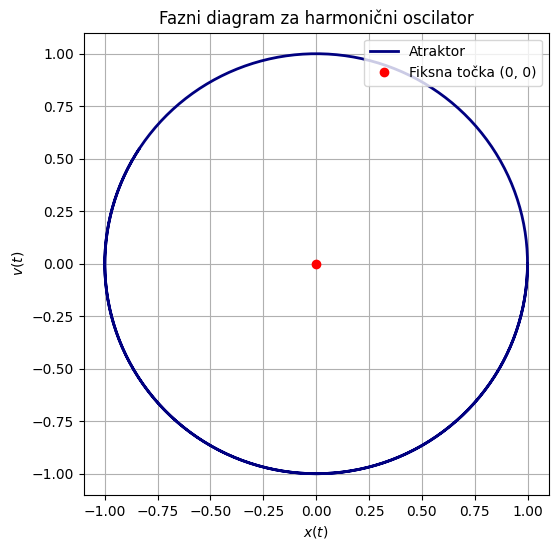

In [14]:
# Plotting the phase diagram (x vs v) for the undamped harmonic oscillator

plt.figure(figsize=(6, 6))

# Phase space plot: velocity vs position
plt.plot(x_t_values_numeric, v_t_values_numeric, label="Atraktor", color='navy',lw=2)
plt.title("Fazni diagram za harmonični oscilator")
plt.xlabel("$x (t)$")
plt.ylabel("$v (t)$")
plt.grid(True)

# Mark the fixed point (0,0) with a red dot
plt.plot(0, 0, 'ro', label="Fiksna točka (0, 0)")
plt.legend(loc="upper right")

plt.show()

# <a id='toc2_'></a>[Jakobijeva matrika in lastne vrednosti za harmonski oscilator](#toc0_)

Jakobijeva matrika in lastne vrednosti sta pomembni orodji za analizo stabilnosti dinamičnih sistemov. Jakobijeva matrika opisuje lokalno linearizacijo nelinearnega sistema okoli fiksne točke, medtem ko lastne vrednosti Jakobijeve matrike določajo naravo stabilnosti fiksne točke.

**Definicija Jakobijeve matrike**

Jakobijeva matrika je matrika parcialnih odvodov vektorske funkcije. Za sistem enačb:

$$
\frac{d}{dt} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} f_1(x_1, x_2) \\ f_2(x_1, x_2) \end{pmatrix}
$$

je Jakobijeva matrika definirana kot:

$$
J = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}
\end{pmatrix}.
$$

## <a id='toc2_1_'></a>[Sistemska enačba harmonskega oscilatorja](#toc0_)

Sistem za harmonski oscilator lahko zapišemo kot sistem dveh diferencialnih enačb prvega reda. Definirajmo položaj $ x_1 = x $ in hitrost $ x_2 = v = \dot{x} $. Potem imamo:

$$
\frac{dx_1}{dt} = x_2,
$$
$$
\frac{dx_2}{dt} = -\frac{k}{m} x_1.
$$

**Jakobijeva matrika**

Jakobijeva matrika za ta sistem je:

$$
J = \begin{pmatrix}
\frac{\partial x_2}{\partial x_1} & \frac{\partial x_2}{\partial x_2} \\
\frac{\partial (-\frac{k}{m} x_1)}{\partial x_1} & \frac{\partial (-\frac{k}{m} x_1)}{\partial x_2}
\end{pmatrix}
=
\begin{pmatrix}
0 & 1 \\
-\frac{k}{m} & 0
\end{pmatrix}.
$$

**Lastne vrednosti Jakobijeve matrike**

Za določitev lastnih vrednosti izračunamo determinanto $ J - \lambda I $, kjer je $ \lambda $ lastna vrednost in $ I $ enotska matrika:

$$
\det \left( \begin{pmatrix}
0 & 1 \\
-\frac{k}{m} & 0
\end{pmatrix} - \lambda \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \right)
=
\det \begin{pmatrix}
-\lambda & 1 \\
-\frac{k}{m} & -\lambda
\end{pmatrix}.
$$

Izračunamo determinanto:

$$
\lambda^2 + \frac{k}{m} = 0.
$$

Rešitev te enačbe nam daje lastne vrednosti:

$$
\lambda = \pm i \sqrt{\frac{k}{m}} = \pm i \omega_0,
$$

kjer je $ \omega_0 = \sqrt{\frac{k}{m}} $ naravna frekvenca nihanja.

**Interpretacija lastnih vrednosti**

Lastne vrednosti $ \lambda = \pm i \omega_0 $ so imaginarne, kar kaže na to, da sistem oscilira okoli fiksne točke. Imaginarne lastne vrednosti so značilne za nevtralno stabilne sisteme, kjer se energija ohranja in sistem neprestano oscilira, namesto da bi se asimptotično stabiliziral ali divergiral. Jakobijeva matrika za harmonski oscilator ima imaginarne lastne vrednosti, kar pomeni, da je sistem **nevtralno stabilen**. Ta rezultat je v skladu s tem, da harmonski oscilator brez dušenja neprestano niha in ne doseže stabilne fiksne točke brez zunanjih motenj, kot je dušenje.


## <a id='toc2_2_'></a>[Prikaz faznega prostora in fazne trajektorije](#toc0_)

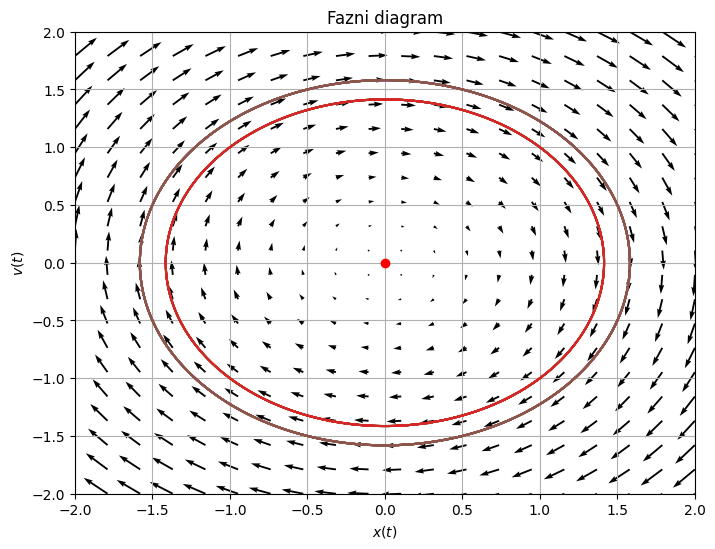

In [15]:
# Ustvarimo vektorsko polje za sistem
X, V = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
dX = V
dV = - omega_0_value**2 * X


t_values_traj = np.linspace(0, 20, 500)

# Začetni pogoji podani kot (x0,v0)
initial_conditions = [(-1.5, 0.5), (1.5, -0.5), (-1, 1), (1, -1), (-0.5, 1.5), (0.5, -1.5)]


plt.figure(figsize=(8, 6))

# Izris vektorskega polja
plt.quiver(X, V, dX, dV, angles='xy')


for x0, v0 in initial_conditions:
    # Reši diferencialne enačbe za dan začetni pogoj
    x_traj = x0 * np.cos(omega_0_value * t_values_traj) + (v0 / omega_0_value) * np.sin(omega_0_value * t_values_traj)
    v_traj = -x0 * omega_0_value * np.sin(omega_0_value * t_values_traj) + v0 * np.cos(omega_0_value * t_values_traj)

    # Nariši trajektorijo
    plt.plot(x_traj, v_traj, label=f"x0={x0}, v0={v0}")

plt.title("Fazni diagram")
plt.xlabel("$x(t)$")
plt.ylabel("$v(t)$")
plt.grid(True)


plt.plot(0, 0, 'ro', label="Fiksna točka (0, 0)")


plt.xlim([-2, 2])
plt.ylim([-2, 2])


plt.show()

# <a id='toc3_'></a>[Dušeno nihanje](#toc0_)

## <a id='toc3_1_'></a>[Definicija sistema (enačba gibanja)](#toc0_)

In [16]:
t = sp.symbols('t')
x = sp.Function('x')(t)
beta, omega0, x0, v0 = sp.symbols('beta omega0 x0 v0')

eq = sp.Eq(x.diff(t, t) + 2 * beta * x.diff(t) + omega0**2 * x, 0)

sol = sp.dsolve(eq, x, ics={x.subs(t, 0): x0, x.diff(t).subs(t, 0): v0})

sol

Eq(x(t), (-beta*x0/(2*sqrt(beta**2 - omega0**2)) - v0/(2*sqrt(beta**2 - omega0**2)) + x0/2)*exp(-t*(beta + sqrt(beta**2 - omega0**2))) + (beta*x0/(2*sqrt(beta**2 - omega0**2)) + v0/(2*sqrt(beta**2 - omega0**2)) + x0/2)*exp(t*(-beta + sqrt(beta**2 - omega0**2))))

## <a id='toc3_2_'></a>[Graf $x(t)$ in $v(t)$ za harmonični oscilator](#toc0_)

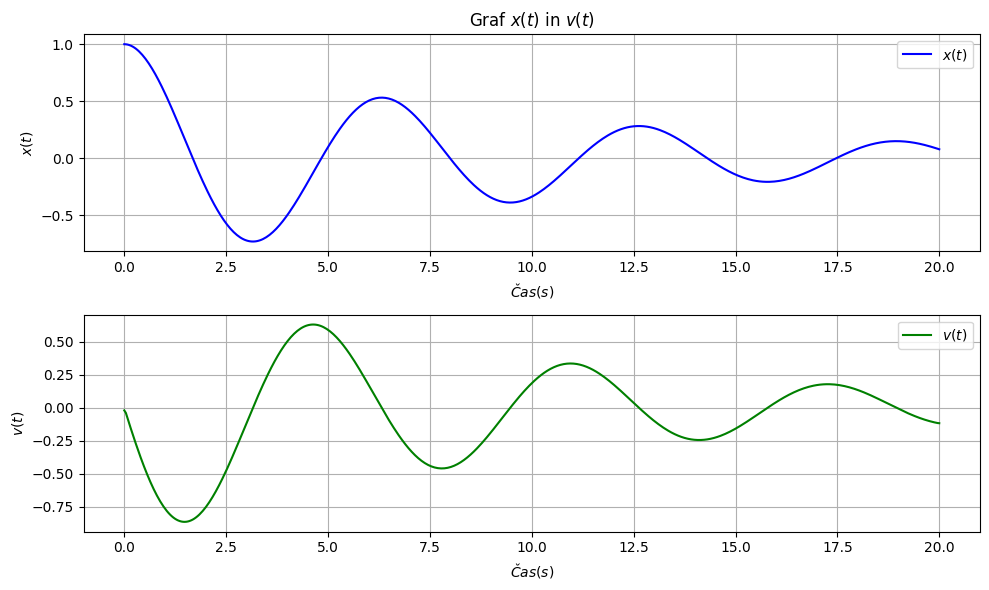

In [17]:
beta_value = 0.1
omega0_value = 1.0
x0_value = 1.0
v0_value = 0.0


x_t_function = sp.lambdify(t, sol.rhs.subs({beta: beta_value, omega0: omega0_value, x0: x0_value, v0: v0_value}), 'numpy')

t_values_numeric = np.linspace(0, 20, 500)

x_t_values_numeric = x_t_function(t_values_numeric)

v_t_values_numeric = np.gradient(x_t_values_numeric, t_values_numeric)

plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(t_values_numeric, x_t_values_numeric, label="$x(t)$", color='blue')
plt.title("Graf $x(t)$ in $v(t)$")
plt.xlabel("$Čas(s)$")
plt.ylabel("$x(t)$")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_values_numeric, v_t_values_numeric, label="$v(t)$", color='green')
plt.xlabel("$Čas(s)$")
plt.ylabel("$v(t)$")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## <a id='toc3_3_'></a>[Stabilnost](#toc0_)

In [18]:
x, v = sp.symbols('x v')
beta, omega0 = sp.symbols('beta omega0')


f1 = v  # dx/dt = v
f2 = -omega0**2 * x - 2 * beta * v  # dv/dt = -omega0^2 * x - 2 * beta * v


F = sp.Matrix([f1, f2])


state_vector = sp.Matrix([x, v])


J_damped = F.jacobian(state_vector)


J_damped.simplify()
J_damped

Matrix([
[         0,       1],
[-omega0**2, -2*beta]])

In [19]:
F = sp.Matrix([f1, f2])

state_vector = sp.Matrix([x, v])

Jacobian = F.jacobian(state_vector)

det_Jacobian = Jacobian.det()

tr_Jacobian = Jacobian.trace()

Jacobian

Matrix([
[         0,       1],
[-omega0**2, -2*beta]])

In [20]:
det_Jacobian

omega0**2

In [21]:
tr_Jacobian

-2*beta

## <a id='toc3_4_'></a>[Lastne vrednosti Jacobijeve matrike $J$](#toc0_)

In [22]:
eigenvalues_damped = J_damped.eigenvals()

eigenvalues_damped

{-beta - sqrt((beta - omega0)*(beta + omega0)): 1,
 -beta + sqrt((beta - omega0)*(beta + omega0)): 1}

<>:45: SyntaxWarning: invalid escape sequence '\l'
<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:47: SyntaxWarning: invalid escape sequence '\l'
<>:50: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:52: SyntaxWarning: invalid escape sequence '\l'
<>:45: SyntaxWarning: invalid escape sequence '\l'
<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:47: SyntaxWarning: invalid escape sequence '\l'
<>:50: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:52: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Rene\AppData\Local\Temp\ipykernel_48024\3074974516.py:45: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_v, l1r, label='$Re(\lambda_1)$', color = "orange")
C:\Users\Rene\AppData\Local\Temp\ipykernel_48024\3074974516.py:46: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_v, l2r, label='$Re(\lambda_2)$', color = "darkred")
C:\Users\Rene\AppData\Local\Temp\ipyk

,beta,lambda_1,lambda_2
0,0.00,0.00 - 1.00i,0.00 + 1.00i
1,0.02,-0.02 - 1.00i,-0.02 + 1.00i
2,0.04,-0.04 - 1.00i,-0.04 + 1.00i
3,0.06,-0.06 - 1.00i,-0.06 + 1.00i
4,0.08,-0.08 - 1.00i,-0.08 + 1.00i
...,...,...,...
95,1.92,-3.56 + 0.00i,-0.28 + 0.00i
96,1.94,-3.60 + 0.00i,-0.28 + 0.00i
97,1.96,-3.64 + 0.00i,-0.27 + 0.00i
98,1.98,-3.69 + 0.00i,-0.27 + 0.00i


(0.0, 2.0)

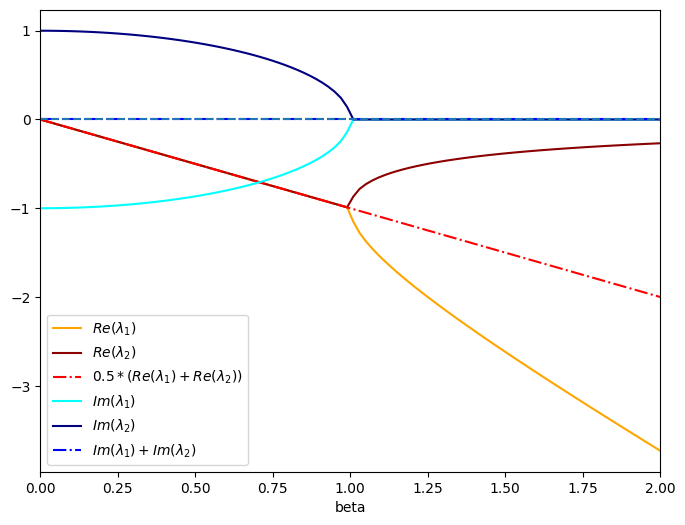

In [35]:
import pandas as pd

lambda_1, lambda_2 = [k for k in eigenvalues_damped.keys()]

# Define numerical values for beta and omega0
beta_val = 0.3
omega0_val = 1.0

x_v = np.linspace(0, 2, 100)
df = {"beta":[], "lambda_1":[], "lambda_2":[]}

l1r = []
l1i = []

l2r = []
l2i = []

for beta_val in x_v:
    # Substitute these values into lambda_1 and lambda_2 to compute the numerical eigenvalues
    lambda_1_numeric = lambda_1.subs({beta: beta_val, omega0: omega0_val})
    lambda_2_numeric = lambda_2.subs({beta: beta_val, omega0: omega0_val})

    lambda_1_real = sp.re(lambda_1_numeric)
    lambda_1_imag = sp.im(lambda_1_numeric)

    lambda_2_real = sp.re(lambda_2_numeric)
    lambda_2_imag = sp.im(lambda_2_numeric)

    l1r.append(lambda_1_real)
    l1i.append(lambda_1_imag)

    l2r.append(lambda_2_real)
    l2i.append(lambda_2_imag)

    df["beta"].append(f"{beta_val:.2f}")
    sign_of_impart = "+" if lambda_1_imag >= 0 else "-"
    df["lambda_1"].append(f"{lambda_1_real:.2f} {sign_of_impart} {abs(lambda_1_imag):.2f}i")
    sign_of_impart = "+" if lambda_2_imag >= 0 else "-"
    df["lambda_2"].append(f"{lambda_2_real:.2f} {sign_of_impart} {abs(lambda_2_imag):.2f}i")

df = pd.DataFrame(df)
display(df)

plt.figure(figsize=(8, 6))
plt.plot(x_v, l1r, label='$Re(\lambda_1)$', color = "orange")
plt.plot(x_v, l2r, label='$Re(\lambda_2)$', color = "darkred")
plt.plot(x_v, [(l1r[i]+l2r[i])/2 for i in range(len(l1r))], label='$0.5*(Re(\lambda_1) + Re(\lambda_2)$)', color='red',ls = "-.")


plt.plot(x_v, l1i, label='$Im(\lambda_1)$',color = "cyan")
plt.plot(x_v, l2i, label='$Im(\lambda_2)$', color = "navy")
plt.plot(x_v, [l1i[i]+l2i[i] for i in range(len(l1i))], label='$Im(\lambda_1) + Im(\lambda_2)$', color='blue', ls = "-.")
plt.hlines(0,0,2,linestyles='dashed')
plt.xlabel('beta')
plt.legend()
plt.xlim(0,2)

## <a id='toc3_5_'></a>[Fazni diagram za dušen harmonski oscilator](#toc0_)

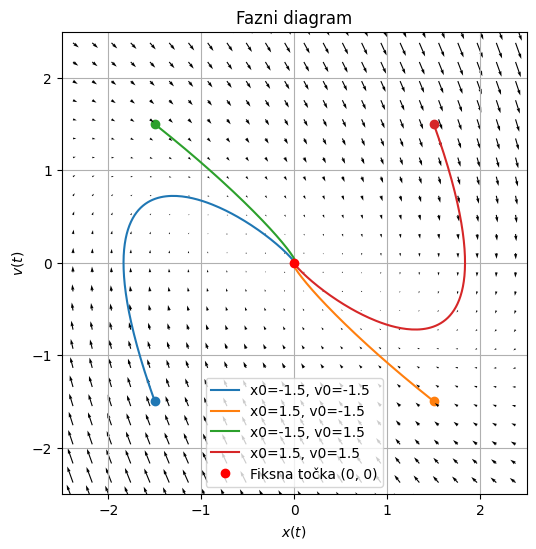

In [36]:
from scipy.integrate import solve_ivp

def damped_oscillator_ivp(t, state, beta, omega0):
    x, v = state
    dxdt = v
    dvdt = -2 * beta * v - omega0**2 * x
    return [dxdt, dvdt]


t_values_ivp = np.linspace(0, 20, 500)

initial_conditions_ivp = [(-1.5, -1.5), (1.5, -1.5), (-1.5, 1.5), (1.5, 1.5)]

plt.figure(figsize=(6, 6))
for fp in initial_conditions_ivp:
    x0, v0 = fp
    plt.scatter(x0,v0)
for x0, v0 in initial_conditions_ivp:
    sol_ivp = solve_ivp(damped_oscillator_ivp, [0, 20], [x0, v0], args=(beta_value, omega0_value), t_eval=t_values_ivp)
    x_values_ivp = sol_ivp.y[0]  # x(t)
    v_values_ivp = sol_ivp.y[1]  # v(t)

    plt.plot(x_values_ivp, v_values_ivp, label=f"x0={x0}, v0={v0}")

X, V = np.meshgrid(np.linspace(-3, 3, 30), np.linspace(-3, 3, 30))
dX = V
dV = -2 * beta_value * V - omega0_value**2 * X

plt.quiver(X, V, dX, dV, angles='xy')

plt.plot(0, 0, 'ro', label="Fiksna točka (0, 0)")

plt.title("Fazni diagram")
plt.xlabel("$x(t)$")
plt.ylabel("$v(t)$")
plt.grid(True)
plt.legend()

# Set limits for clarity
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])

plt.show()

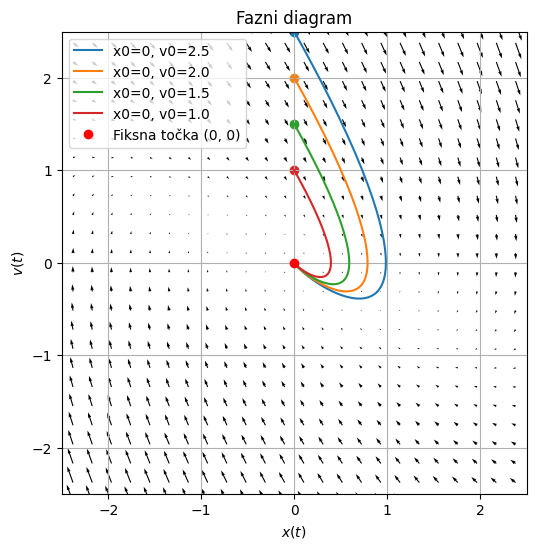

In [37]:
t_values_ivp = np.linspace(0, 40, 1200)

initial_conditions_ivp = [(0, 2.5), (0, 2.0), (0, 1.5), (0, 1.0)]

plt.figure(figsize=(6, 6))
for fp in initial_conditions_ivp:
    x0, v0 = fp
    plt.scatter(x0,v0)
for x0, v0 in initial_conditions_ivp:
    sol_ivp = solve_ivp(damped_oscillator_ivp, [0, 40], [x0, v0], args=(beta_value, omega0_value), t_eval=t_values_ivp)
    x_values_ivp = sol_ivp.y[0]  # x(t)
    v_values_ivp = sol_ivp.y[1]  # v(t)

    plt.plot(x_values_ivp, v_values_ivp, label=f"x0={x0}, v0={v0}")

X, V = np.meshgrid(np.linspace(-3, 3, 30), np.linspace(-3, 3, 30))
dX = V
dV = -2 * beta_value * V - omega0_value**2 * X

plt.quiver(X, V, dX, dV, angles='xy')

plt.plot(0, 0, 'ro', label="Fiksna točka (0, 0)")

plt.title("Fazni diagram")
plt.xlabel("$x(t)$")
plt.ylabel("$v(t)$")
plt.grid(True)
plt.legend()

# Set limits for clarity
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])

plt.show()

## <a id='toc3_6_'></a>[Kritično dušenje](#toc0_)

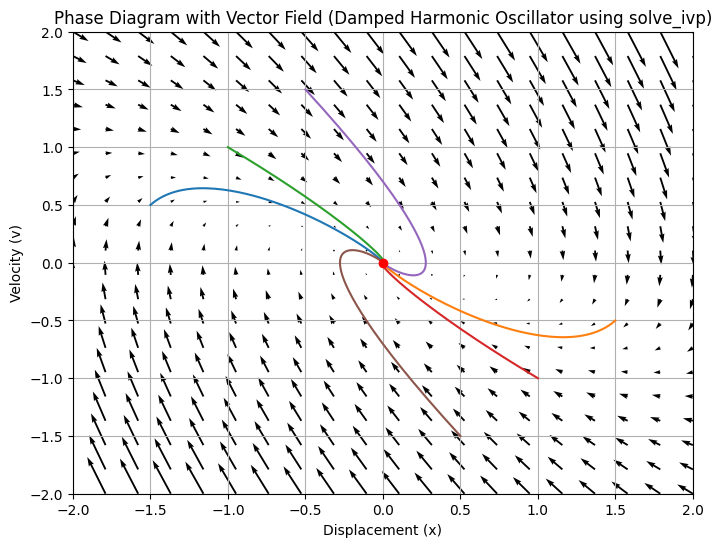

In [38]:
# Step 5 (Updated): Plot the phase diagram using solve_ivp for the damped harmonic oscillator

from scipy.integrate import solve_ivp

beta_value = 0.9
omega0_value = 1.0
# Define the system of equations for the damped harmonic oscillator using solve_ivp
def damped_oscillator_ivp(t, state, beta, omega0):
    x, v = state
    dxdt = v
    dvdt = -2 * beta * v - omega0**2 * x
    return [dxdt, dvdt]

# Time range for integration
t_values_ivp = np.linspace(0, 20, 500)

# Initial conditions for multiple trajectories (as in previous example)
initial_conditions_ivp = [(-1.5, 0.5), (1.5, -0.5), (-1, 1), (1, -1), (-0.5, 1.5), (0.5, -1.5)]

# Create a figure for the phase diagram
plt.figure(figsize=(8, 6))

# Solve for each initial condition and plot the trajectories using solve_ivp
for x0, v0 in initial_conditions_ivp:
    # Solve the differential equations using solve_ivp
    sol_ivp = solve_ivp(damped_oscillator_ivp, [0, 20], [x0, v0], args=(beta_value, omega0_value), t_eval=t_values_ivp)
    x_values_ivp = sol_ivp.y[0]  # x(t)
    v_values_ivp = sol_ivp.y[1]  # v(t)

    # Plot the trajectory
    plt.plot(x_values_ivp, v_values_ivp, label=f"x0={x0}, v0={v0}")

# Create the vector field for the damped system
X, V = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
dX = V
dV = -2 * beta_value * V - omega0_value**2 * X

# Plot the vector field
plt.quiver(X, V, dX, dV, angles='xy')

# Mark the fixed point at (0, 0)
plt.plot(0, 0, 'ro', label="Fixed Point (0, 0)")

# Add labels and grid
plt.title("Phase Diagram with Vector Field (Damped Harmonic Oscillator using solve_ivp)")
plt.xlabel("Displacement (x)")
plt.ylabel("Velocity (v)")
plt.grid(True)
#plt.legend()

# Set limits for clarity
plt.xlim([-2, 2])
plt.ylim([-2, 2])

plt.show()

![image.png](https://upload.wikimedia.org/wikipedia/commons/3/3b/Stability_Diagram.png)

# <a id='toc4_'></a>[Diskretni sistemi](#toc0_)

## <a id='toc4_1_'></a>[ Model populacijske rasti](#toc0_)

Uporabimo primer logistične mape:
$$
\begin{equation}
    x_{n+1} = r x_n (1 - x_n)
\end{equation}
$$

V tem primeru je $x_{n+1}$ enak populaciji v naslednji generaciji, v kolikor je predhodna generacija imaje populacijo $x_n$ in je faktor reprodukcije $r$.

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_map(r, x):
  return r * x * (1 - x)

def trace_log_map(r:float,x0:float,n_final:int)->np.array:
  x = np.zeros(n_final)
  x[0] = x0
  for i in range(n_final-1):
    x[i+1] = logistic_map(r,x[i])
  return x

## <a id='toc4_2_'></a>[Kaj če je faktor reprodukcije $\leq$ 1?](#toc0_)

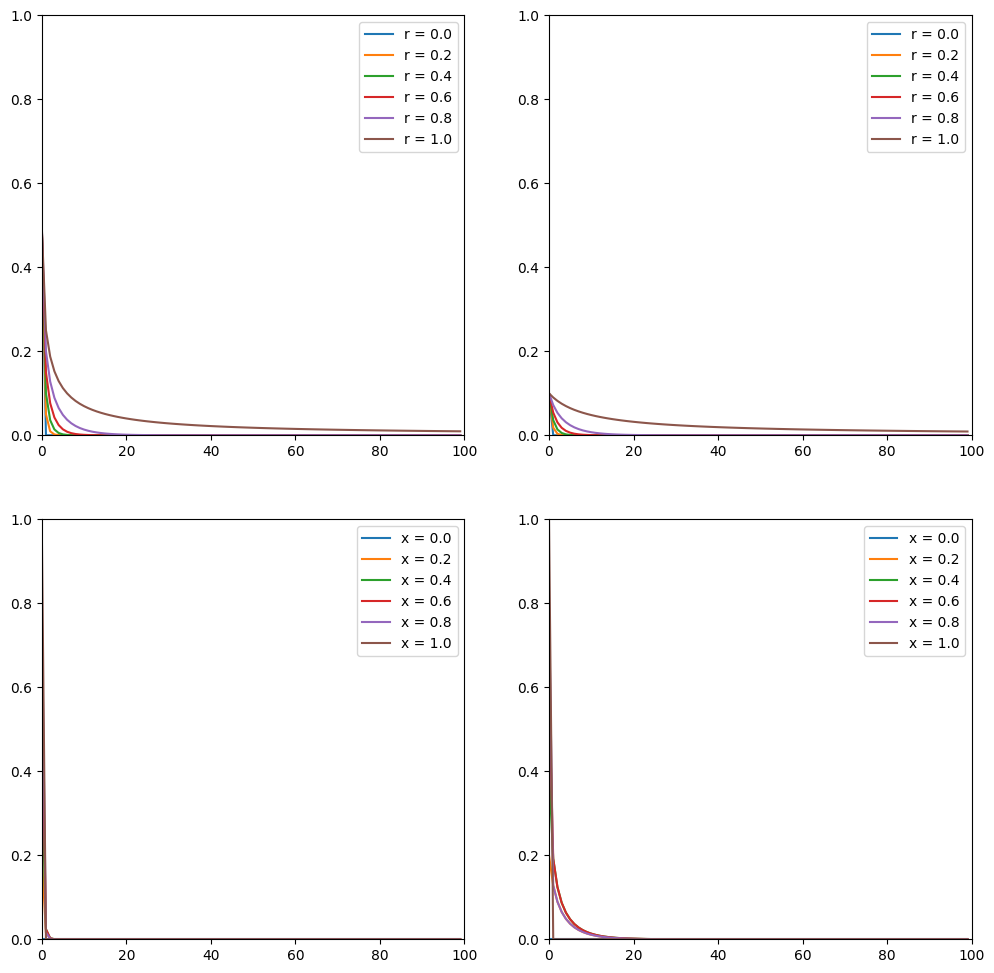

In [40]:
r_list = [i/10 for i in range(0,11,2)]


plt.figure(figsize=(12, 12))


plt.subplot(2,2,1)
temp_data = {}
for r in r_list:
  temp_data[f"r = {r}"] = trace_log_map(r,0.5,100)

for k, v in temp_data.items():
  plt.plot(v, label=k)
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend()


plt.subplot(2,2,2)
temp_data = {}
for r in r_list:
  temp_data[f"r = {r}"] = trace_log_map(r,0.1,100)

for k, v in temp_data.items():
  plt.plot(v, label=k)
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend()

plt.subplot(2,2,3)
temp_data = {}
for r in r_list:
  temp_data[f"x = {r}"] = trace_log_map(0.1,r,100)

for k, v in temp_data.items():
  plt.plot(v, label=k)
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend()



plt.subplot(2,2,4)
temp_data = {}
for r in r_list:
  temp_data[f"x = {r}"] = trace_log_map(0.8,r,100)

for k, v in temp_data.items():
  plt.plot(v, label=k)
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend()


plt.show()

## <a id='toc4_3_'></a>[Kaj če je faktor reprodukcije $1 < r \leq$ 2?](#toc0_)

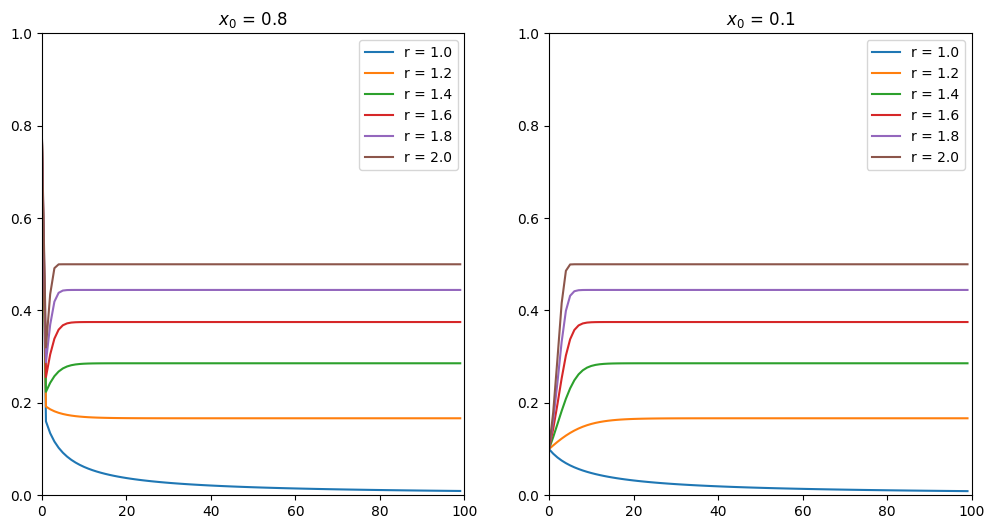

In [41]:
r_list = [i/10 for i in range(10,21,2)]


plt.figure(figsize=(12, 6))


plt.subplot(1,2,1)
plt.title("$x_0$ = 0.8")
temp_data = {}
for r in r_list:
  temp_data[f"r = {r}"] = trace_log_map(r,0.8,100)
for k, v in temp_data.items():
  plt.plot(v, label=k)
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend()


plt.subplot(1,2,2)
plt.title("$x_0$ = 0.1")
temp_data = {}
for r in r_list:
  temp_data[f"r = {r}"] = trace_log_map(r,0.1,100)

for k, v in temp_data.items():
  plt.plot(v, label=k)
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend()


plt.show()

## <a id='toc4_4_'></a>[Kaj če je faktor reprodukcije $2 < r \leq$ 3?](#toc0_)

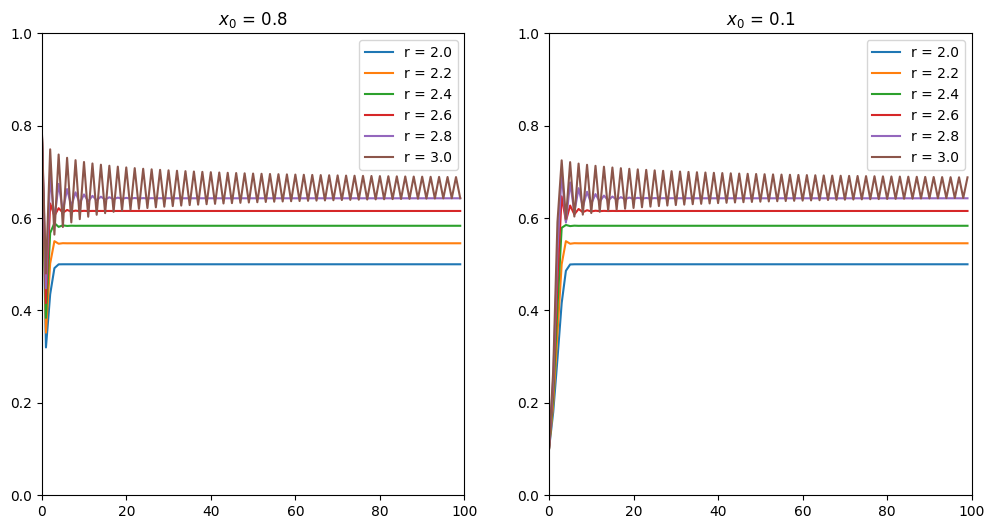

In [42]:
r_list = [i/10 for i in range(20,31,2)]


plt.figure(figsize=(12, 6))


plt.subplot(1,2,1)
plt.title("$x_0$ = 0.8")
temp_data = {}
for r in r_list:
  temp_data[f"r = {r}"] = trace_log_map(r,0.8,100)
for k, v in temp_data.items():
  plt.plot(v, label=k)
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend()


plt.subplot(1,2,2)
plt.title("$x_0$ = 0.1")
temp_data = {}
for r in r_list:
  temp_data[f"r = {r}"] = trace_log_map(r,0.1,100)

for k, v in temp_data.items():
  plt.plot(v, label=k)
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend()


plt.show()

## <a id='toc4_5_'></a>[Kaj če je faktor reprodukcije $3 < r \leq$ 4?](#toc0_)

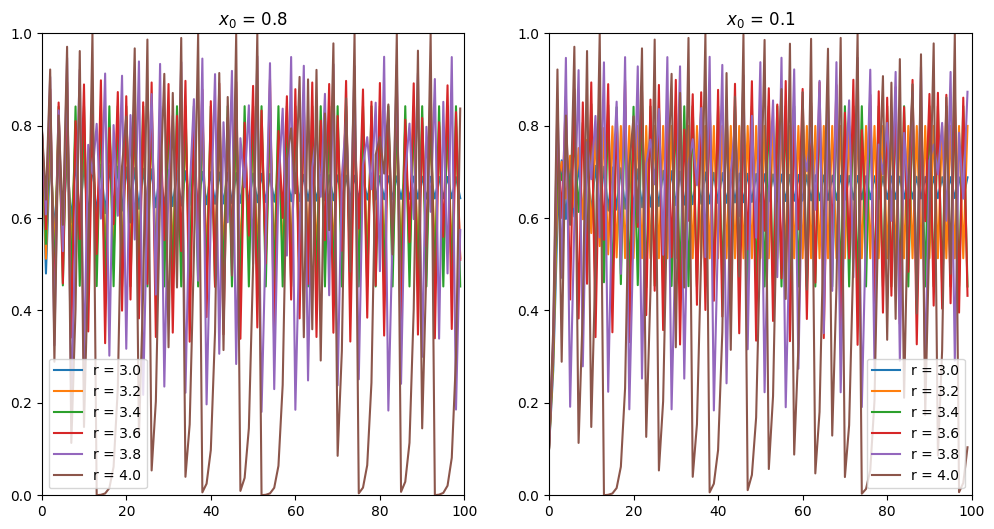

In [43]:
r_list = [i/10 for i in range(30,41,2)]


plt.figure(figsize=(12, 6))


plt.subplot(1,2,1)
plt.title("$x_0$ = 0.8")
temp_data = {}
for r in r_list:
  temp_data[f"r = {r}"] = trace_log_map(r,0.8,100)
for k, v in temp_data.items():
  plt.plot(v, label=k)
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend()


plt.subplot(1,2,2)
plt.title("$x_0$ = 0.1")
temp_data = {}
for r in r_list:
  temp_data[f"r = {r}"] = trace_log_map(r,0.1,100)

for k, v in temp_data.items():
  plt.plot(v, label=k)
plt.ylim(0,1)
plt.xlim(0,100)
plt.legend()


plt.show()

## <a id='toc4_6_'></a>[Kako se stacionarne točke spreminjajo glede na $r$?](#toc0_)

In [44]:
from tqdm.auto import tqdm as tqdm
import numpy as np

In [45]:
def poisci_fiskne_in_periodicne_tocke(casovna_vrsta: np.array, epsilon: float = 1e-6, max_perioda: int = 10) -> dict:
    """
    Poišče fiksne in periodične točke v časovni vrsti (np.array).

    casovna_vrsta: np.array s časovno serijo
    tolerance: toleranca za določitev fiksnih točk (privzeto 1e-6)
    max_perioda: maksimalna dolžina cikla, ki ga iščemo (privzeto 10)

    Vrne slovar z fiksnimi in periodičnimi točkami.
    """
    return list(set(casovna_vrsta))

generating time series:   0%|          | 0/400 [00:00<?, ?it/s]

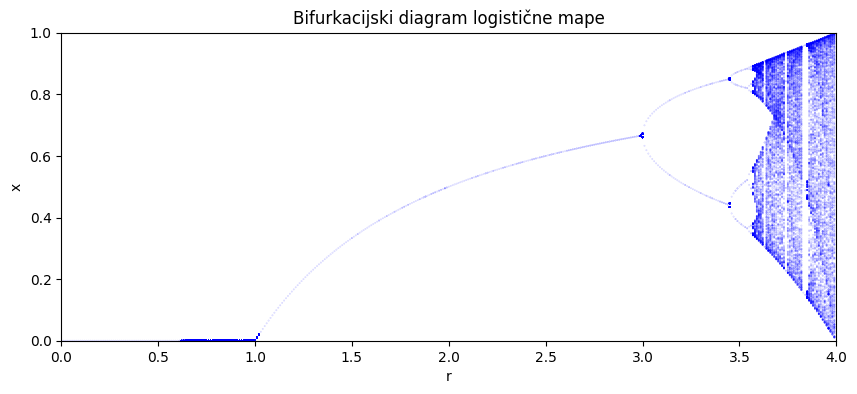

In [46]:
r_list = np.linspace(0,4,400,endpoint=False)
r_list
temp_data = {}
for r in tqdm(r_list, total = len(r_list), desc="generating time series"):
  temp_data[f"r = {r}"] = trace_log_map(r,0.8,2000)[1500::]

# Iskanje in izris točk
r_values = []
x_values = []
colors = []

for r_str, casovna_vrsta in temp_data.items():
    r = float(r_str.split(" = ")[1])
    rezultati = poisci_fiskne_in_periodicne_tocke(casovna_vrsta, epsilon = 1e-6, max_perioda = 40)

    # Dodamo fiksne točke
    for fp in rezultati:
        r_values.append(r)
        x_values.append(fp)
        colors.append('blue')

# Izris bifurkacijskega diagrama
plt.figure(figsize=(10, 4))
plt.scatter(r_values, x_values, c=colors, s=0.1, alpha=0.2)  # Uporabimo scatter za obarvane točke
plt.title("Bifurkacijski diagram logistične mape")
plt.xlabel("r")
plt.ylabel("x")
plt.xlim(0,4)
plt.ylim(0,1)
plt.show()